In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

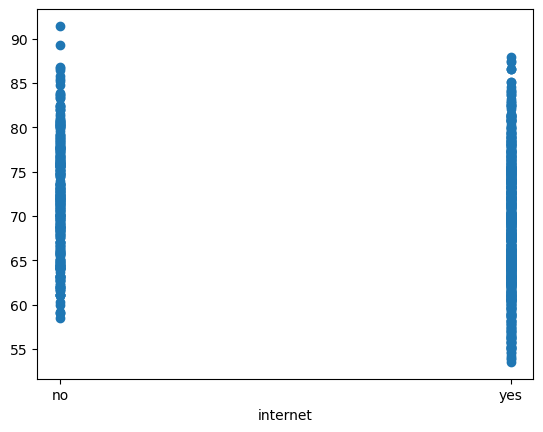

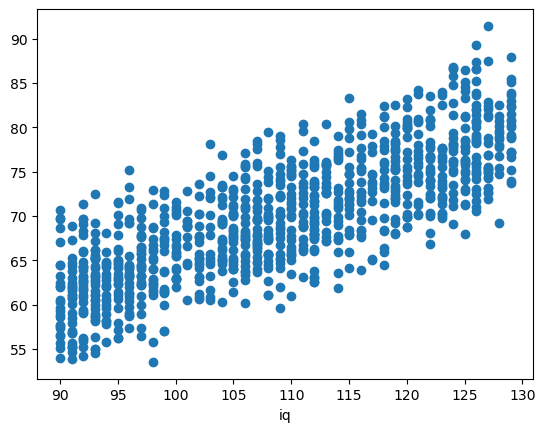

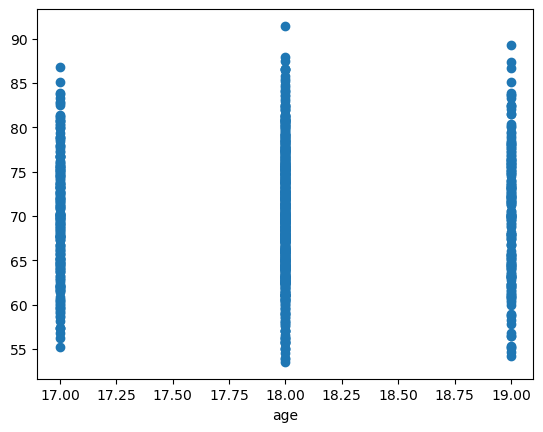

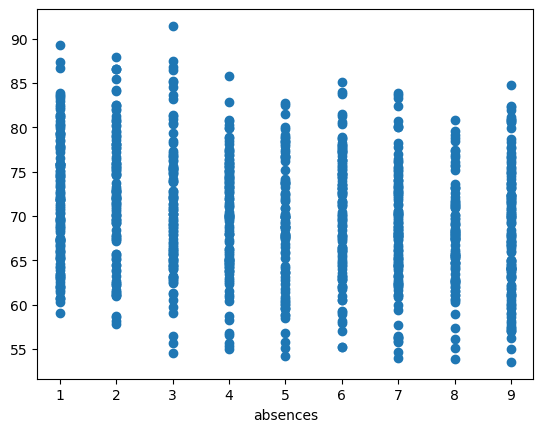

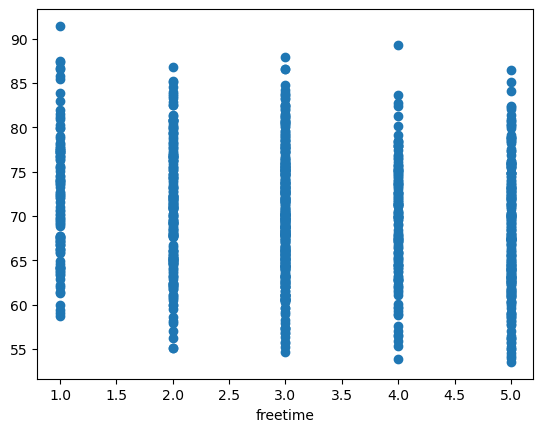

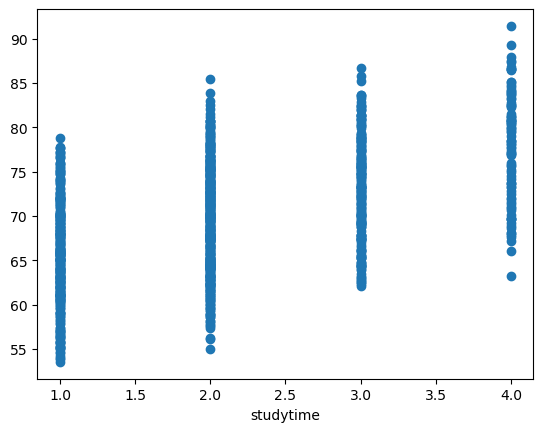

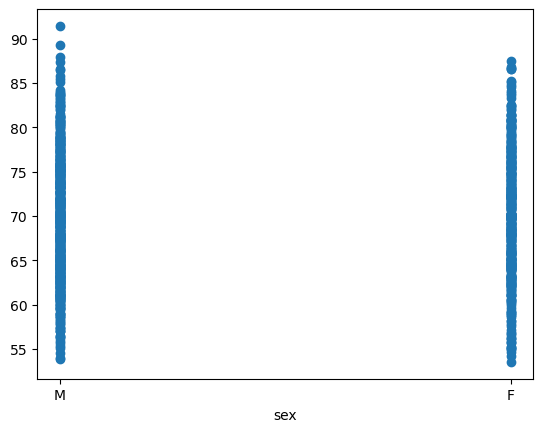

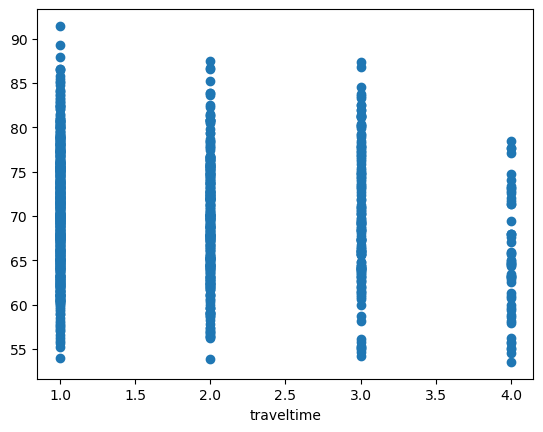

In [2]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
plt.scatter(data.internet,data.marks)
plt.xlabel("internet")
plt.show()
plt.scatter(data.iq,data.marks)
plt.xlabel("iq")
plt.show()
plt.scatter(data.age,data.marks)
plt.xlabel("age")
plt.show()
plt.scatter(data.absences,data.marks)
plt.xlabel("absences")
plt.show()
plt.scatter(data.freetime,data.marks)
plt.xlabel("freetime")
plt.show()
plt.scatter(data.studytime,data.marks)
plt.xlabel("studytime")
plt.show()
plt.scatter(data.sex,data.marks)
plt.xlabel("sex")
plt.show()
plt.scatter(data.traveltime,data.marks)
plt.xlabel("traveltime")
plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    df = pd.DataFrame(x_train, columns=['internet', 'sex', 'traveltime' , 'studytime' , 'freetime' , 'absences' , 'age' , 'iq'])
    label_encoder = LabelEncoder()
    df['sex'] = label_encoder.fit_transform(df['sex'])
    df['internet'] = label_encoder.fit_transform(df['internet'])
    x_train = np.array(df.iloc[:,0:8])
    

    return x_train

x_train = feature_changing(x_train)

In [3]:
def z_score(x_train):

  # ---------
    x_mean = np.mean(x_train,axis=0)
    x_std = np.std(x_train,axis=0)
    x_train= (x_train - x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [4]:
def cost(x_train,y_train,w,b):
    y_pred = np.dot(x_train, w) + b
    loss = np.mean((y_pred - y_train) ** 2)

    return loss

In [5]:
def gradient_descent(x_train, y_train, w, b):
    learning_rate = 0.01
    num_iterations = 1000
    m = len(y_train)
    
    for i in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(x_train, w) + b
        
        # Compute gradients
        dw = (1/m) * np.dot(x_train.T, (y_pred - y_train))
        db = (1/m) * np.sum(y_pred - y_train)
        
        # Update weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Optionally, print the cost for monitoring
        if i % 100 == 0:
            current_cost = cost(x_train, y_train, w, b)
            print(f"Iteration {i}: Cost {current_cost}")
    
    return w, b

In [6]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Iteration 0: Cost 4888.0846600069835
Iteration 100: Cost 654.6109089963835
Iteration 200: Cost 87.67463113204015
Iteration 300: Cost 11.743787541879316
Iteration 400: Cost 1.5732064981041682
Iteration 500: Cost 0.210775347740913
Iteration 600: Cost 0.028250065047376892
Iteration 700: Cost 0.003794918644247641
Iteration 800: Cost 0.0005180721353783924
Iteration 900: Cost 7.895428041160911e-05
Iteration 0: Cost 2.0104257805680554e-05
Iteration 100: Cost 1.2216474490967648e-05
Iteration 200: Cost 1.115914739672713e-05
Iteration 300: Cost 1.1017400294793919e-05
Iteration 400: Cost 1.0998394976377297e-05
Iteration 500: Cost 1.0995846389288445e-05
Iteration 600: Cost 1.0995504570271948e-05
Iteration 700: Cost 1.0995458716341676e-05
Iteration 800: Cost 1.0995452563805328e-05
Iteration 900: Cost 1.0995451738060508e-05
Congratulations, your accuracy is 100.0%
